In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

Prediction is done by using binary classification.

- Attribute1  = pelvic_incidence  (numeric)
- Attribute2 = pelvic_tilt (numeric)
- Attribute3 = lumbar_lordosis_angle (numeric)
- Attribute4 = sacral_slope (numeric)
- Attribute5 = pelvic_radius (numeric)
- Attribute6 = degree_spondylolisthesis (numeric)
- Attribute7 = pelvic_slope (numeric)
- Attribute8 = Direct_tilt (numeric)
- Attribute9 = thoracic_slope (numeric)
- Attribute10 = cervical_tilt (numeric)
- Attribute11 = sacrum_angle (numeric)
- Attribute12 = scoliosis_slope (numeric)

Attribute class {Abnormal, Normal} 

In [2]:
dataset = pd.read_csv('data/Dataset_spine.csv',usecols=[
    'Col1',
    'Col2',
    'Col3',
    'Col4',
    'Col5',
    'Col6',
    'Col7',
    'Col8',
    'Col9',
    'Col10',
    'Col11',
    'Col12',
    'Class_att'
])

In [3]:
dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
training_features = [
    'pelvic_incidence',
    'pelvic_tilt',
    'lumbar_lordosis_angle',
    'sacral_slope',
    'pelvic_radius',
    'degree_spondylolisthesis',
    'pelvic_slope',
    'direct_tilt',
    'thoracic_slope',
    'cervical_tilt',
    'sacrum_angle',
    'scoliosis_slope',
]
target = 'class_att'
dataset.columns = training_features + [target]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
class_att                   310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [6]:
dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


## EDA

with regression line

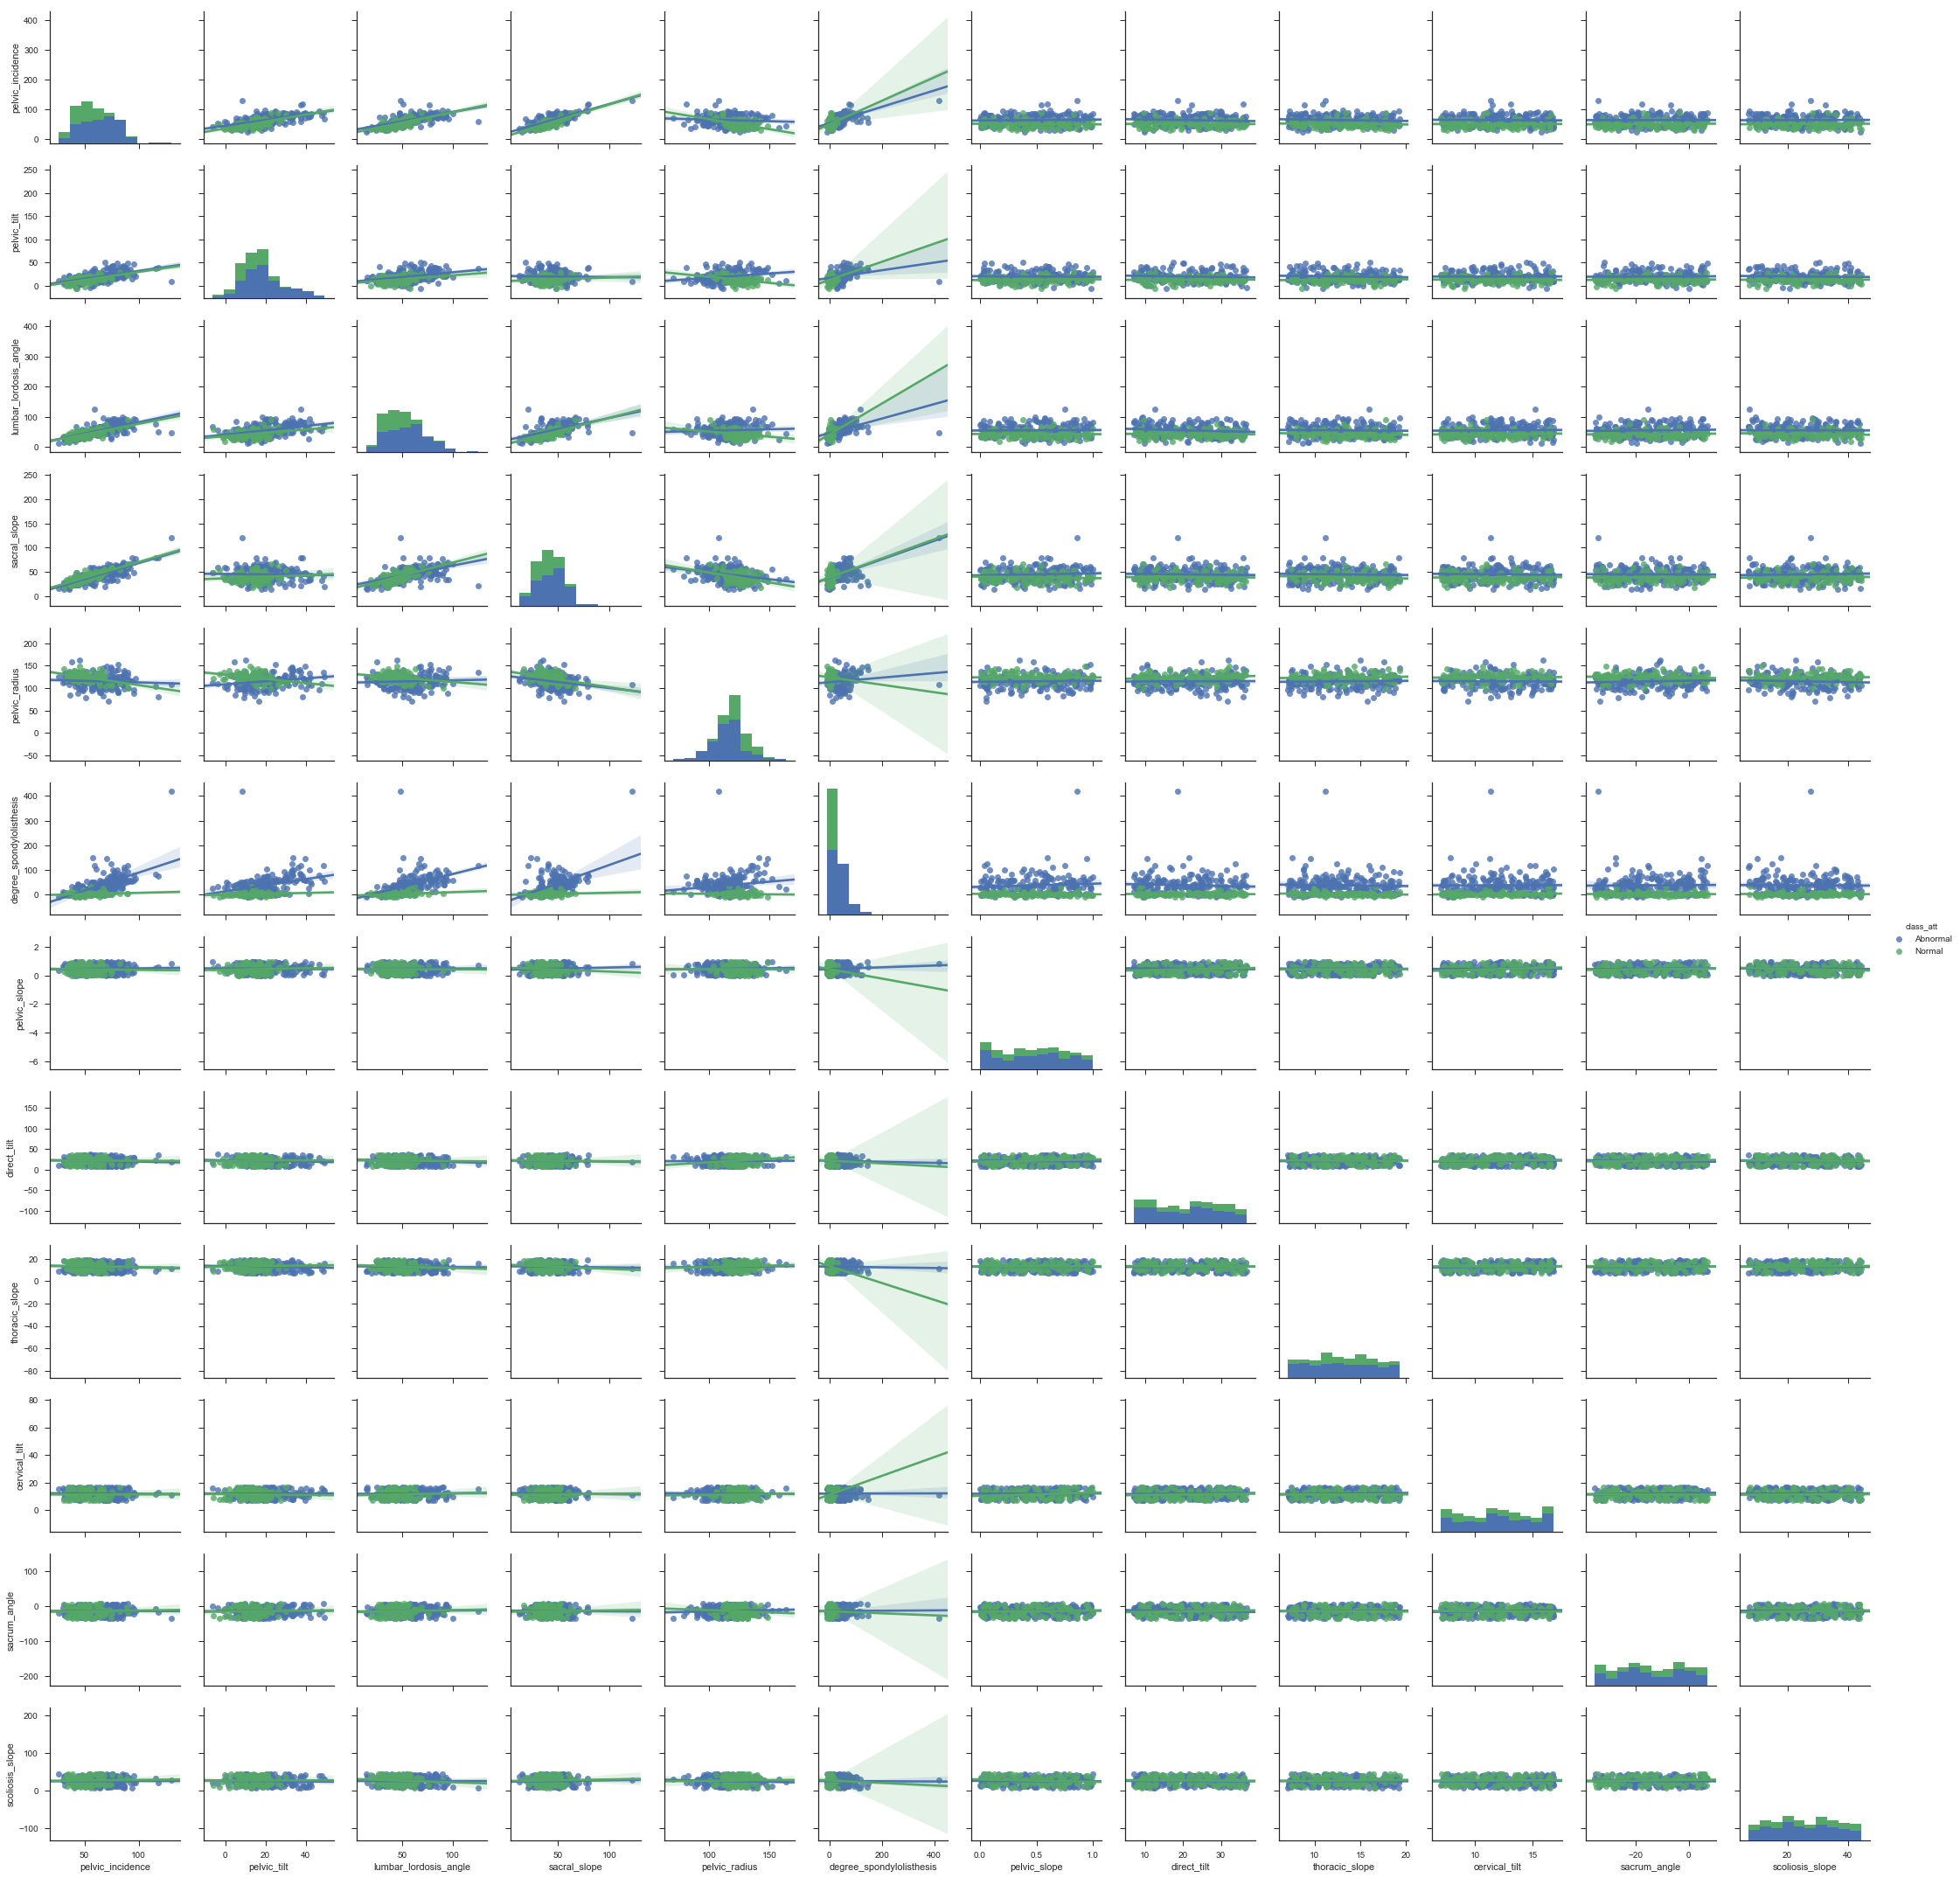

In [7]:
sns.set(style="ticks")
sns.pairplot(dataset, hue="class_att", kind="reg")
plt.show()

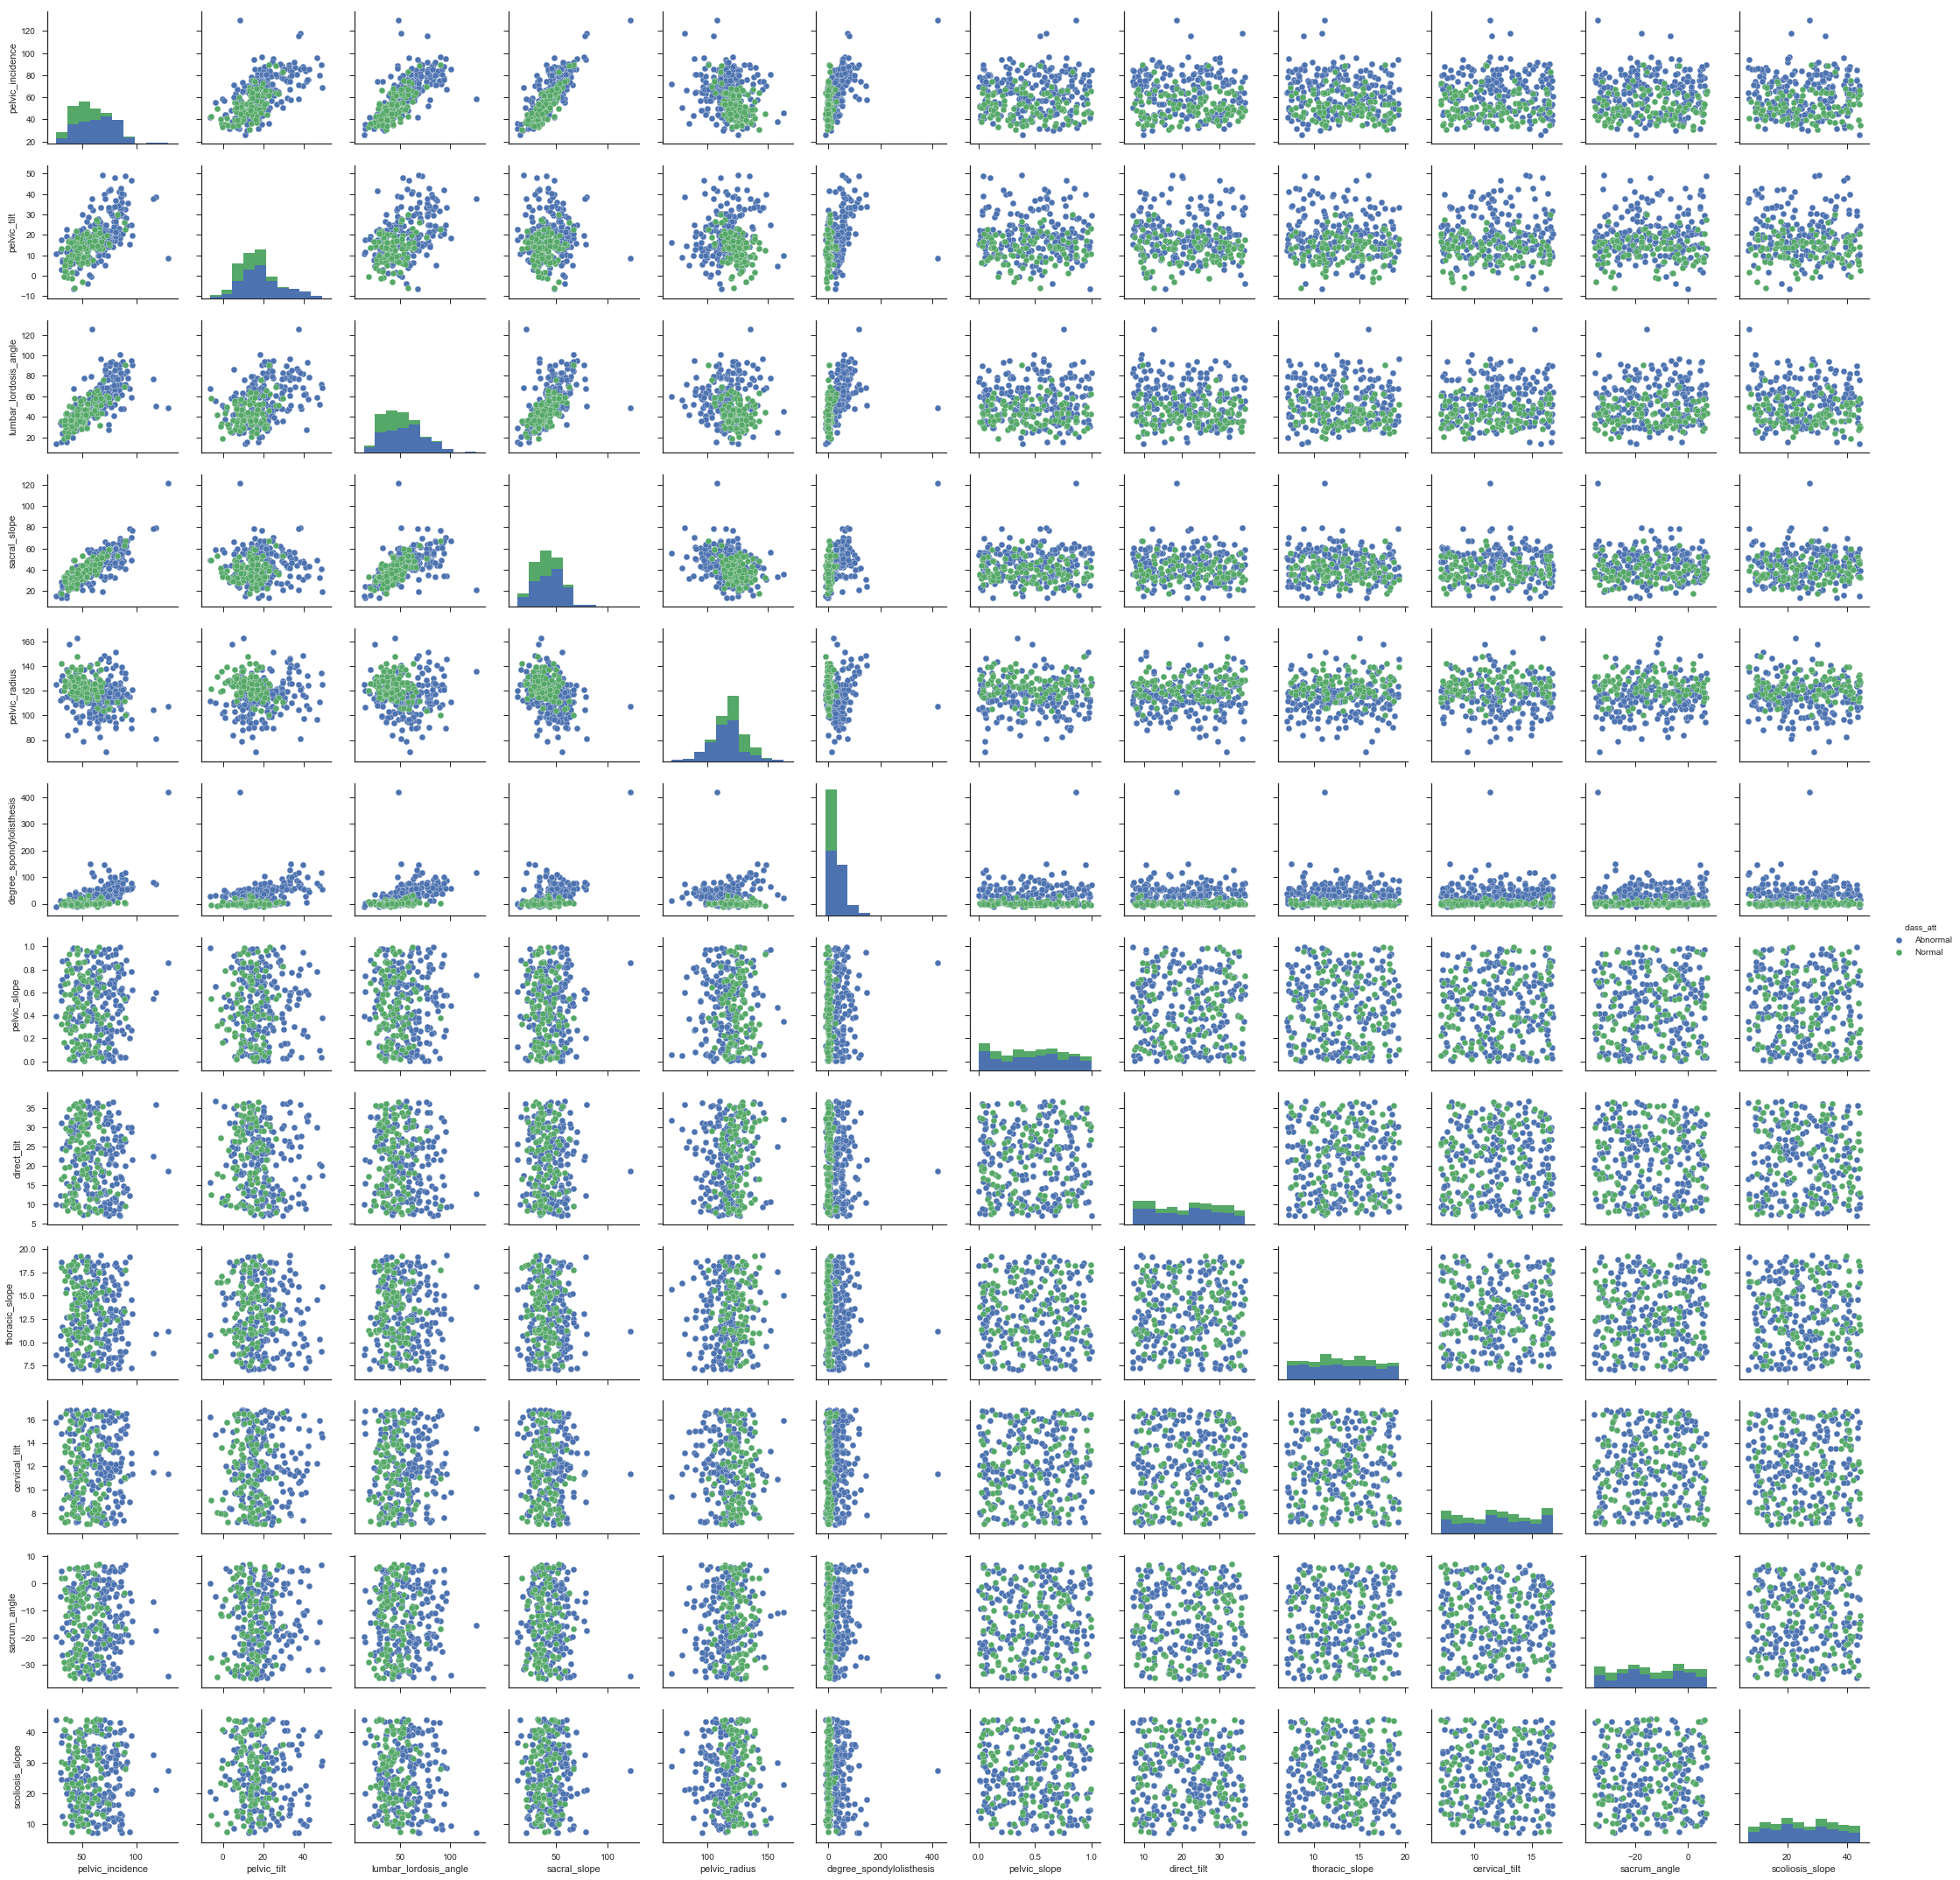

In [8]:
sns.set(style="ticks")
sns.pairplot(dataset, hue="class_att")
plt.show()

split training and test set

In [9]:
train_x, test_x, train_y, test_y = train_test_split(dataset[training_features], dataset[target], test_size=0.2, random_state=42)

In [10]:
print(train_x.shape)
print(train_y.shape)

(248, 12)
(248,)


In [11]:
print(test_x.shape)
print(test_y.shape)

(62, 12)
(62,)


Use logistic regression to predict the outcome

In [25]:
model = LogisticRegression()

model.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_pred = model.predict(test_x)

In [28]:
y_pred

array(['Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal'], dtype=object)

calculating the accuracy

In [29]:
model.score(test_x, test_y)

0.83870967741935487